In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
BATCH_SIZE = 32
IMAGE_LENGTH = 256
IMAGE_BREADTH = 256
CHANNELS = 3
EPOCHS = 25

In [16]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True
)
train = train_datagen.flow_from_directory(
        '../DataSet/Potato_split/train',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [17]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True)
val = validation_datagen.flow_from_directory(
        '../DataSet/Potato_split/val',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [18]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test = test_datagen.flow_from_directory(
        '../DataSet/Potato_split/test',
        target_size=(IMAGE_LENGTH,IMAGE_BREADTH),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [19]:
class_names = list(train.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
input_dimensions = (IMAGE_LENGTH, IMAGE_BREADTH, CHANNELS)


model = keras.models.Sequential([
    
    keras.layers.Conv2D(32, (3, 3), input_shape = input_dimensions, activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')

])

model.build(input_shape = input_dimensions)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [22]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [23]:
history = model.fit(
    train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val,
    # steps_per_epoch=47,
    # validation_steps=6
)

Epoch 1/25
54/54 [==============================] - 50s 915ms/step - loss: 0.9413 - accuracy: 0.4741 - val_loss: 0.9106 - val_accuracy: 0.4651
Epoch 2/25
54/54 [==============================] - 49s 900ms/step - loss: 0.8177 - accuracy: 0.5845 - val_loss: 1.1246 - val_accuracy: 0.5814
Epoch 3/25
54/54 [==============================] - 46s 842ms/step - loss: 0.5240 - accuracy: 0.7792 - val_loss: 0.5464 - val_accuracy: 0.7814
Epoch 4/25
54/54 [==============================] - 48s 896ms/step - loss: 0.3171 - accuracy: 0.8710 - val_loss: 0.3214 - val_accuracy: 0.8837
Epoch 5/25
54/54 [==============================] - 48s 891ms/step - loss: 0.2837 - accuracy: 0.8855 - val_loss: 0.2294 - val_accuracy: 0.9116
Epoch 6/25
54/54 [==============================] - 49s 906ms/step - loss: 0.2581 - accuracy: 0.8983 - val_loss: 0.2300 - val_accuracy: 0.9116
Epoch 7/25
54/54 [==============================] - 48s 887ms/step - loss: 0.1986 - accuracy: 0.9250 - val_loss: 0.2176 - val_accuracy: 0.9070

In [24]:
model.evaluate(test)

7/7 [==============================] - 6s 935ms/step - loss: 0.1204 - accuracy: 0.9722


[0.12039567530155182, 0.9722222089767456]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

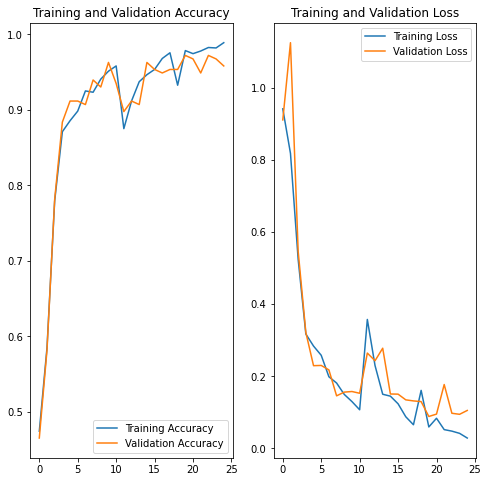

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
def predict(model, img):
    # img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

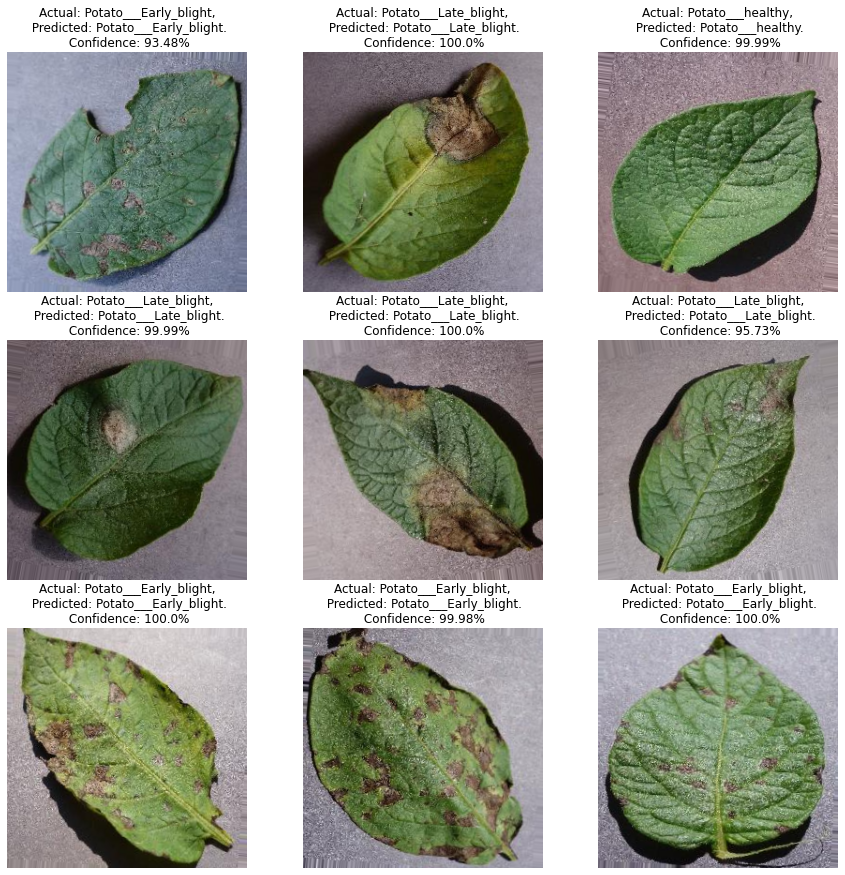

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
model_version = 2
model_name = f'potato_{model_version}'
model.save(f"../saved_models/{model_name}")

INFO:tensorflow:Assets written to: ../saved_models/potato_2\assets


In [34]:
import tensorflowjs as tfjs
from tensorflow import keras
model_name = f'potato_{model_version}'
saved_model = keras.models.load_model(f"../saved_models/{model_name}")
tfjs.converters.save_keras_model(saved_model, "../saved_models/js/potato")
